# **Prevendo a evasão e o sucesso acadêmico dos alunos**

## Objetivo:

- Prever a evasão
- saber como os dados estão distribuído

### Base de Dados
**UCI Machine Learning Repository**.  
Link: https://doi.org/10.24432/C5MC89.  
Realinho,Valentim, Vieira Martins,Mónica, Machado,Jorge, and Baptista,Luís. (2021). Predict students' dropout and academic success.  

### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importando a Base de Dados

In [2]:
df = pd.read_csv('./data.csv', sep=';')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


### Entendendo os Dados

In [3]:
# Tamanho da base de dados
df.shape

(4424, 37)

In [4]:
# Títulos das colunas 
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [5]:
# Informação
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [6]:
# Descrição dos dados
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


### Pré-processamento dos dados

In [7]:
# Valores nulos
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [8]:
# Valores duplicados
df.duplicated().sum()

0

In [9]:
# Valores únicos do target 
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [10]:
# Transformando a coluna Target em valores numéricos 
catg, rotulos = pd.factorize(df['Target'])
df['new_Target'] = catg
df['new_Target'].unique()

array([0, 1, 2], dtype=int64)

In [11]:
# Verificando os valores numéricos
df.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,new_Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,1
5,2,39,1,9991,0,19,133.1,1,37,37,...,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate,1
6,1,1,1,9500,1,1,142.0,1,19,38,...,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate,1
7,1,18,4,9254,1,1,119.0,1,37,37,...,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout,0
8,1,1,3,9238,1,1,137.0,62,1,1,...,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate,1
9,1,1,1,9238,1,1,138.0,1,1,19,...,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout,0


In [12]:
# criando um novo dataset sem a coluna categórica 
new_df = df.drop('Target', axis=1)
new_df.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,new_Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,1
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,1
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,0
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,1
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,0


In [13]:
# Correlação com a coluna alvo
new_df.corr()['new_Target']

Marital status                                   -0.074310
Application mode                                 -0.116928
Application order                                 0.027393
Course                                            0.024210
Daytime/evening attendance\t                      0.066439
Previous qualification                           -0.027984
Previous qualification (grade)                    0.025096
Nacionality                                       0.002098
Mother's qualification                           -0.075941
Father's qualification                           -0.035183
Mother's occupation                               0.051664
Father's occupation                               0.051455
Admission grade                                   0.038716
Displaced                                         0.070649
Educational special needs                         0.003751
Debtor                                           -0.154802
Tuition fees up to date                           0.3421

In [14]:
# Escolhendo as colunas com melhores correlação
new_df = new_df.iloc[:,[1,10,11,13,14,15,16,17,18,20,22,23,26,28,29,34,36]]
new_df

,Application mode,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Inflation rate,new_Target
0,17,5,9,1,0,0,1,1,0,0,0,0,0,0,0,1.4,0
1,15,3,3,1,0,0,0,1,0,0,6,6,0,6,6,-0.3,1
2,1,9,9,1,0,0,0,1,0,0,6,0,0,6,0,1.4,0
3,17,5,3,1,0,0,1,0,0,0,6,8,0,6,10,-0.8,1
4,39,9,9,0,0,0,1,0,0,0,6,9,0,6,6,-0.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,5,4,0,0,0,1,1,0,0,6,7,0,6,8,2.8,1
4420,1,9,9,1,0,1,0,0,0,1,6,6,0,6,6,0.6,0
4421,1,9,9,1,0,0,1,0,1,0,7,8,0,8,9,-0.3,0
4422,1,7,4,1,0,0,1,0,1,0,5,5,0,5,6,-0.8,1


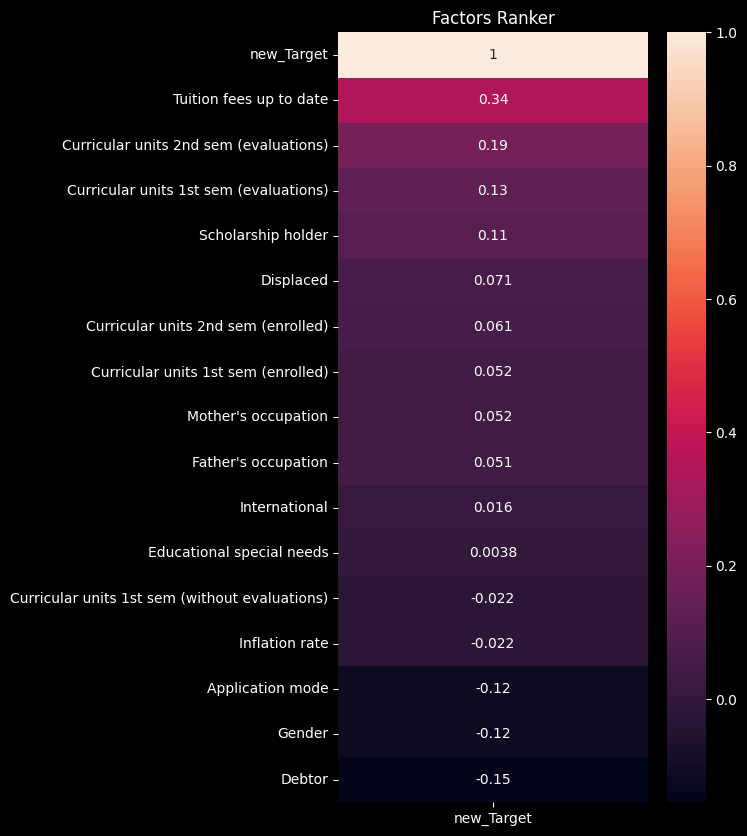

In [15]:
# Visualizando a correlação de target com as outras colunas 
plt.figure(figsize = (5,10))
sns.heatmap(new_df.corr()[['new_Target']].sort_values(by='new_Target', ascending=False), annot = True)
plt.title('Factors Ranker')
plt.show()

### EDA - Análise Exploratória de Dados

In [16]:
# Visualizando os valores de de target
# 0 = Dropout 
# 1 = Graduate
# 2 = Enrolled'
new_df['new_Target'].value_counts()

new_Target
1    2209
0    1421
2     794
Name: count, dtype: int64

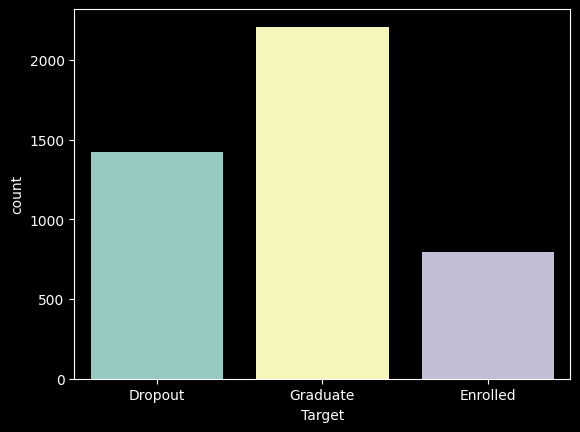

In [17]:
# Gráfico de contagem de valores
sns.countplot(data=df, x='Target');

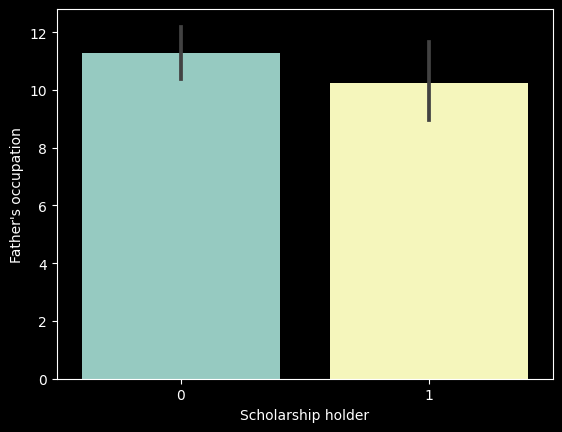

In [18]:
# Analisando a correlação do status social familiar e bolsa de estudo
sns.barplot(y="Father's occupation", x='Scholarship holder', data=new_df);

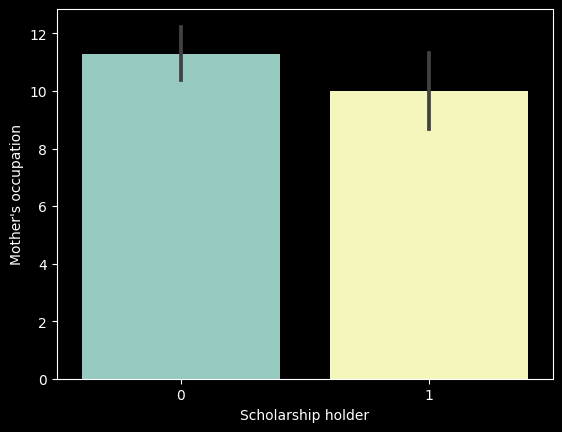

In [19]:
# Analisando a correlação do status social familiar e bolsa de estudo
sns.barplot(y="Mother's occupation",x='Scholarship holder', data=new_df);

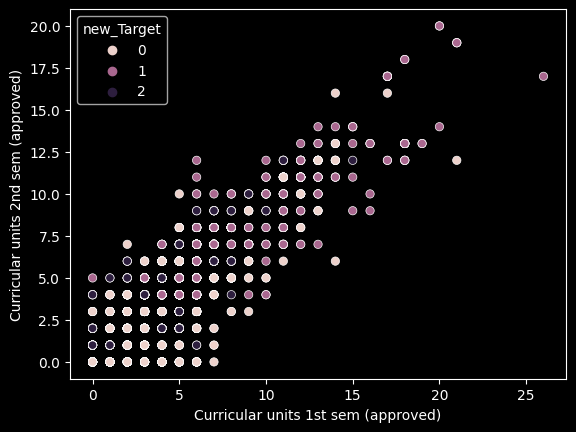

In [20]:
# visualizar a relação entre duas variáveis contínuas e adicionar uma dimensão de cor
# 'Unidades curriculares 1º semestre (aprovado)' representada no eixo X
# 'Unidades curriculares 2º semestre (aprovado)' representada no eixo Y
# 'new_Target' representada pela cor dos pontos
# 0 = Dropout 
# 1 = Graduate
# 2 = Enrolled
sns.scatterplot(
    x = 'Curricular units 1st sem (approved)',
    y = 'Curricular units 2nd sem (approved)',
    hue = new_df['new_Target'],
    data = df
);

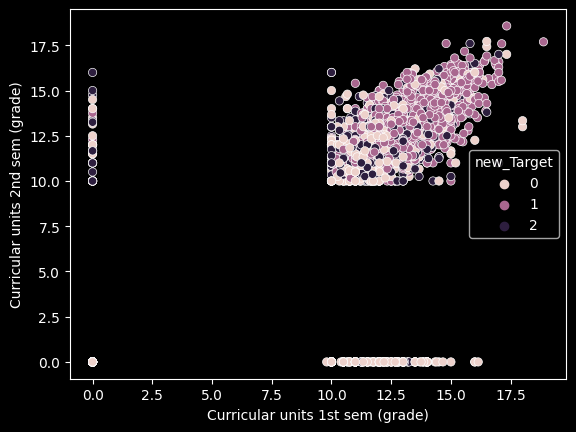

In [21]:
# visualizar a relação entre duas variáveis contínuas e adicionar uma dimensão de cor
# 'Unidades curriculares 1º semestre (grau)' representada no eixo X
# 'Unidades curriculares 2º semestre (grau)' representada no eixo Y
# 'new_Target' representada pela cor dos pontos
# 0 = Dropout 
# 1 = Graduate
# 2 = Enrolled
sns.scatterplot(
    x = 'Curricular units 1st sem (grade)',
    y = 'Curricular units 2nd sem (grade)',
    hue = new_df['new_Target'],
    data = df
);

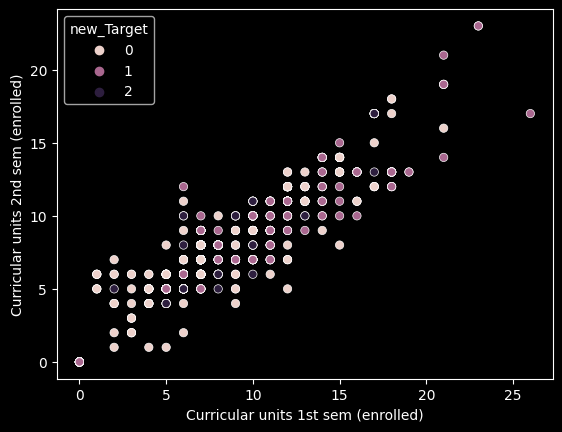

In [22]:
# visualizar a relação entre duas variáveis contínuas e adicionar uma dimensão de cor
# 'Unidades curriculares 1º semestre (inscritos)' representada no eixo X
# 'Unidades curriculares 2.º semestre (inscritos)' representada no eixo Y
# 'new_Target' representada pela cor dos pontos
# 0 = Dropout 
# 1 = Graduate
# 2 = Enrolled
sns.scatterplot(
    x = 'Curricular units 1st sem (enrolled)',
    y = 'Curricular units 2nd sem (enrolled)',
    hue = new_df['new_Target'],
    data = df
);

### Best Fit escolhendo a melhor desatribuição

In [23]:
def tipo_distribuicao(df, coluna):
    # lib
    from fitter import Fitter

    valores_coluna = df[coluna].values

    f = Fitter(
        valores_coluna,
        distributions=[
            'gamma', 'lognorm', 'beta', 'burr', 'norm', 
            'expon', 'pareto', 'triang', 'uniform', 'weibull_min', 'weibull_max', 
            'gumbel_r', 'gumbel_l', 'chi2', 't', 'f'
        ]
    )
    f.fit()
    f.summary()
    print(f.df_errors.sort_values(by="sumsquare_error").head())


             sumsquare_error          aic          bic  kl_div  ks_statistic  \
burr                0.374613  1161.562540  1187.141738     inf      0.430898   
gamma               0.488809  1105.600101  1124.784500     inf      0.440475   
f                   0.510369   957.831478   983.410676     inf      0.386076   
chi2                0.518800  1789.710727  1808.895126     inf      0.557976   
weibull_min         0.621566   910.236836   929.421235     inf      0.386076   

             ks_pvalue  
burr               0.0  
gamma              0.0  
f                  0.0  
chi2               0.0  
weibull_min        0.0  


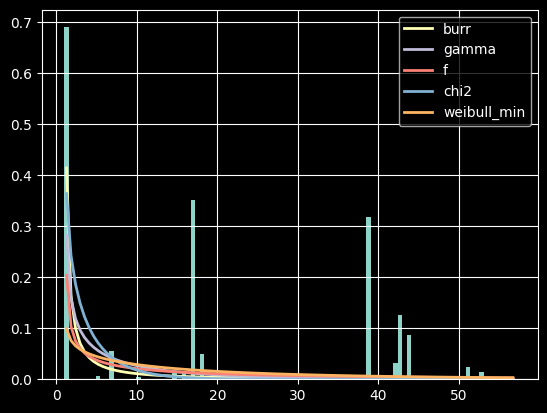

In [24]:
# Testando a função
tipo_distribuicao(new_df, 'Application mode')